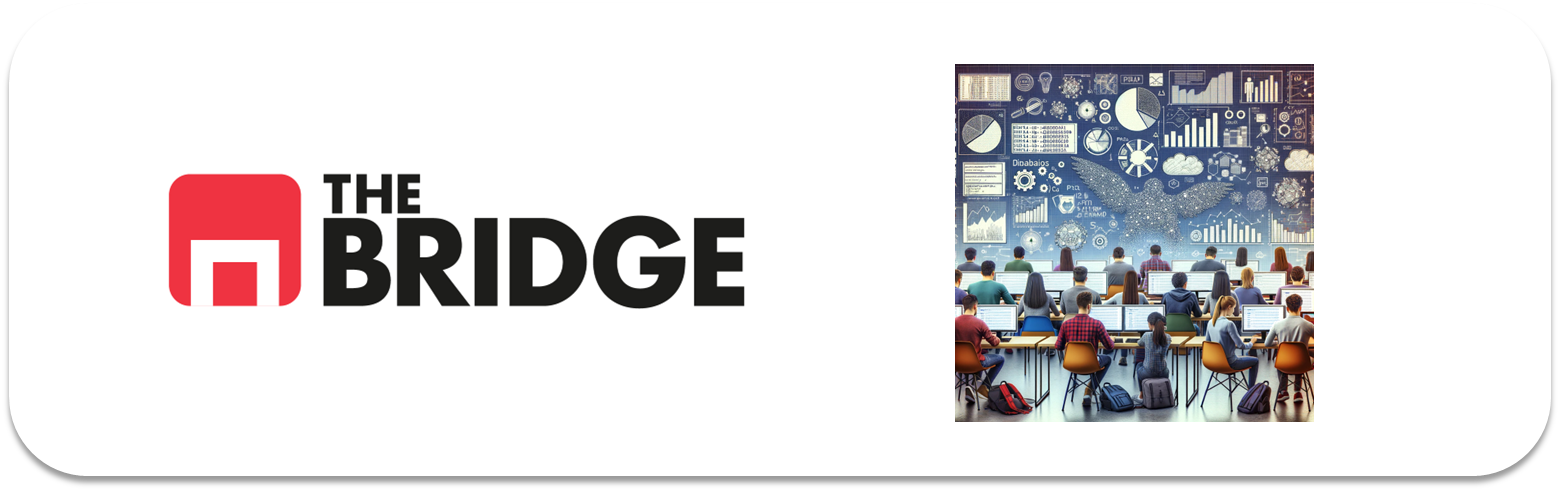

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [36]:
### Utilizare esta celda para poder hacer las importaciones
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
################### 1 ###################
df_path = "./data/hard_to_find/obligatoria_hard.csv"
df_casas = pd.read_csv(df_path, sep= "|")
df_casas.head()
print(df_casas.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


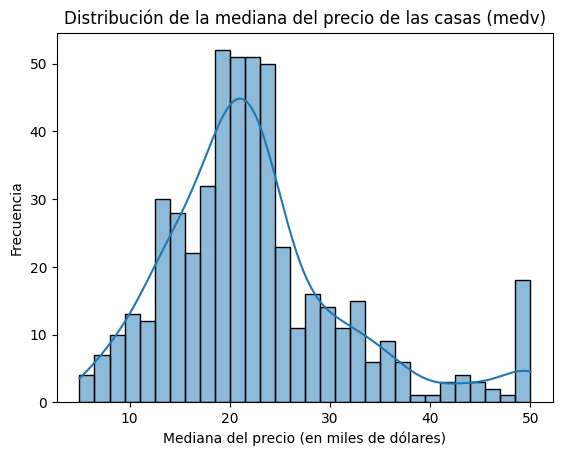

In [23]:
##################### 2 #############
sns.histplot(df_casas['MEDV'], kde=True, bins=30)
plt.title("Distribución de la mediana del precio de las casas (medv)")
plt.xlabel("Mediana del precio (en miles de dólares)")
plt.ylabel("Frecuencia")
plt.show()

La distribución no es perfectamente normal, pero está centrada aproximadamente entre $20,000 y $25,000.
Existe una cola hacia la derecha, lo que indica que hay algunas casas con precios mucho más altos.
Un pico significativo alrededor de $50,000, probablemente debido a un límite superior impuesto en el dataset (posible truncamiento).

In [27]:
################# 3 ##############
X = df_casas.drop(columns=["MEDV"])
y = df_casas["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X, y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.

In [28]:
################ 4 ###################
 # Ya lo hice antes srry


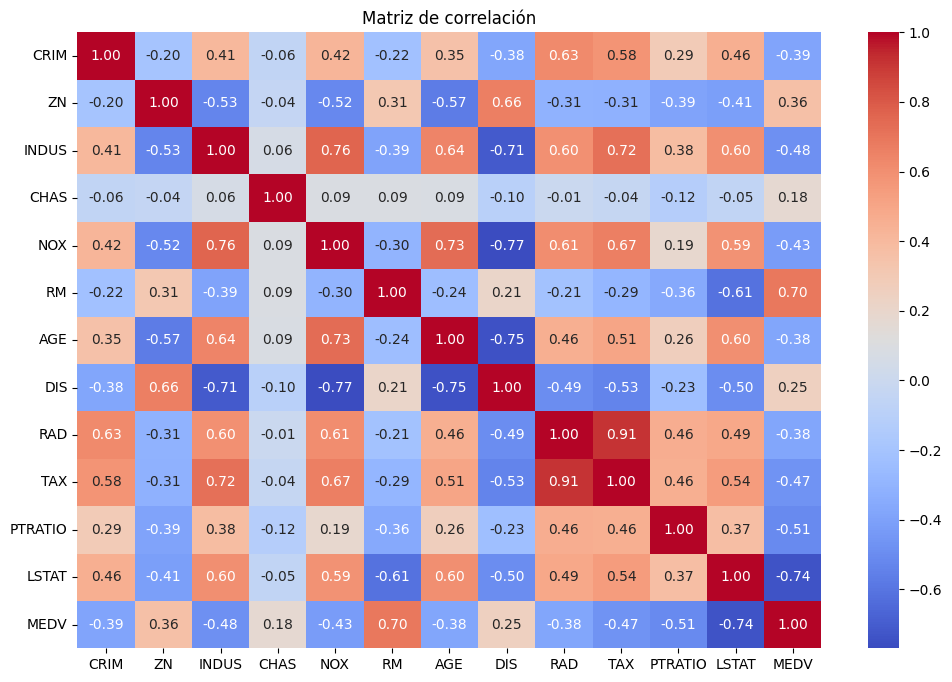

In [29]:
############## 5 ##############
correlation_matrix = df_casas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [31]:
######## 5 #############
selected_features = ["RM", "LSTAT", "PTRATIO", "NOX", "DIS"]
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [34]:
########### 6 ###################3
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
############## 7 #############
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
##################3 8 ############33
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': linear_model.coef_
})
print(coefficients)

   Feature  Coefficient
0       RM     3.219924
1    LSTAT    -4.127738
2  PTRATIO    -2.214225
3      NOX    -2.113137
4      DIS    -2.603842


Regresión Lineal
MSE: 25.20
R²: 0.66


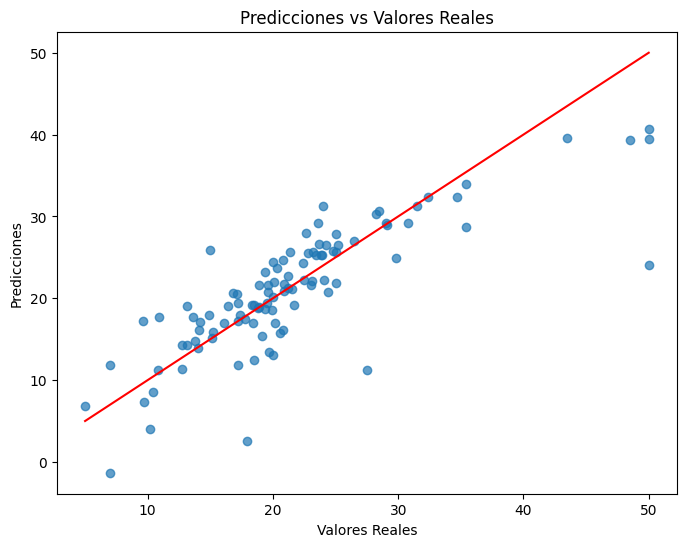

In [43]:
############ 9 #############3
preds = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Regresión Lineal")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle= "-")
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

In [44]:
################ 10 ###################
### Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

In [45]:
### Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

In [46]:

print("Ridge Regression")
print(f"MSE: {ridge_mse:.2f}")
print(f"R²: {ridge_r2:.2f}")

print("Lasso Regression")
print(f"MSE: {lasso_mse:.2f}")
print(f"R²: {lasso_r2:.2f}")

Ridge Regression
MSE: 25.18
R²: 0.66
Lasso Regression
MSE: 25.07
R²: 0.66


In [47]:
### Comparación de coeficientes
ridge_coeffs = ridge_model.coef_
lasso_coeffs = lasso_model.coef_

coeff_comparison = pd.DataFrame({
    'Feature': selected_features,
    'Ridge Coefficients': ridge_coeffs,
    'Lasso Coefficients': lasso_coeffs
})
print(coeff_comparison)


   Feature  Ridge Coefficients  Lasso Coefficients
0       RM            3.220726            3.216655
1    LSTAT           -4.116540           -4.089816
2  PTRATIO           -2.209603           -2.094521
3      NOX           -2.093594           -1.693062
4      DIS           -2.575983           -2.133943


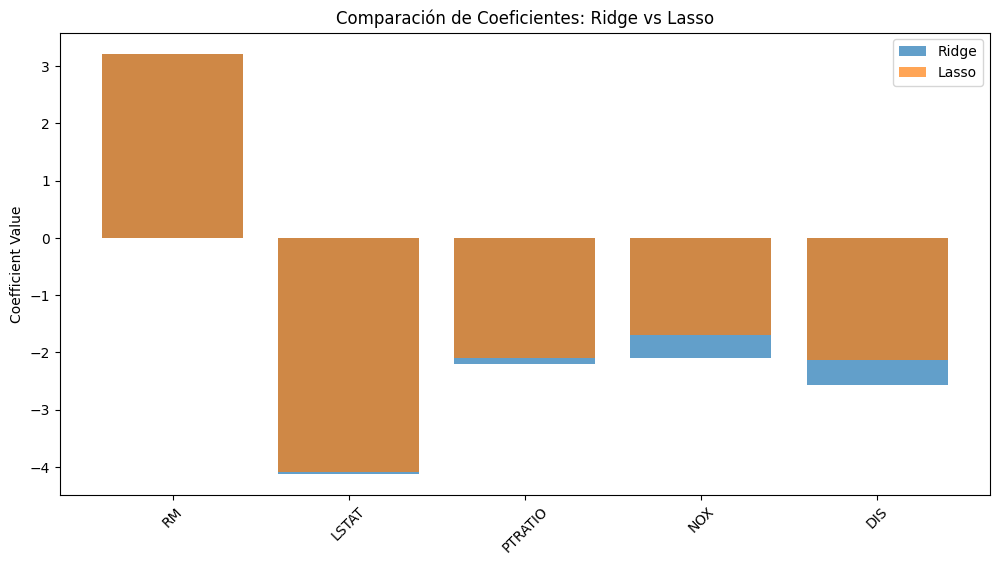

In [48]:
### Graficamente
plt.figure(figsize=(12, 6))
plt.bar(selected_features, ridge_coeffs, alpha=0.7, label='Ridge')
plt.bar(selected_features, lasso_coeffs, alpha=0.7, label='Lasso')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Comparación de Coeficientes: Ridge vs Lasso')
plt.legend()
plt.show()


################# 11 ####################
En el gráfico de comparación de coeficientes, es posible observar cómo Ridge distribuye los pesos de manera más uniforme, mientras que Lasso ajusta algunos coeficientes a cero.
Esto indica que Lasso podría simplificar el modelo, aunque a costa de una ligera pérdida en la capacidad de predicción.